In [225]:
import pandas as pd
import numpy as np
#from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.svm import SVC                            #SVM
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
import matplotlib.pylab as plt
import numpy as np
#import graphviz
import itertools

%matplotlib inline

# turn our data to a dataframe
credit_df = pd.read_csv( "german-credit-card.txt", delim_whitespace = True, header = None)

# add column names to our data
columns = ['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount',
           'saving_acc', 'present_emp_since', 'inst_rate', 'personal_status',
           'other_debtors', 'residing_since', 'property', 'age',
           'inst_plans', 'housing', 'num_credits',
           'job', 'dependents', 'telephone', 'foreign_worker', 'status']
           
credit_df.columns = columns

# select our tatger name (i.e good credit, bad credit)
credit_df.target_names= ['Good', 'Bad']

# look at our data frame
credit_df

/var/folders/rp/8y6kqydx4gz7_qbqgv893ccm0000gn/T/ipykernel_32383/7129532.py:34: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  credit_df.target_names= ['Good', 'Bad']


,checkin_acc,duration,credit_history,purpose,amount,saving_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [226]:
X_features = list( credit_df.columns )
X_features.remove( 'status' )
# the columns in our data frame is our features for the NN

In [227]:
credit_df_complete = pd.get_dummies( credit_df[X_features], drop_first = True )
credit_df_complete # theres 48 columns


,duration,amount,inst_rate,residing_since,age,num_credits,dependents,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,...,property_A124,inst_plans_A142,inst_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202
0,6,1169,4,4,67,2,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,1,0,0,...,0,0,1,1,0,0,1,0,0,0
2,12,2096,2,3,49,1,2,0,0,1,...,0,0,1,1,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,24,4870,3,4,53,2,2,0,0,0,...,1,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,0,1,...,0,0,1,1,0,1,0,0,0,0
996,30,3857,4,4,40,1,1,0,0,0,...,0,0,1,1,0,0,0,1,1,0
997,12,804,4,4,38,1,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0
998,45,1845,4,4,23,1,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [228]:
Y = credit_df.status - 1  # the staus we set corresponds to a 1 or 2
X = credit_df_complete   # pandas dataframe

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

# print(credit_df_complete.shape)

# multi-layer perceptron classifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print('acc for training data: {:.3f}'.format(mlp.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test, y_test)))

acc for training data: 0.583
acc for test data: 0.610


#### PLEASE ADD A FEW LINES CODE AS FOLLOWS TO IMPROVE THE MODEL, For example, you need to do data normalization, data standardization, and other data mining models.   IF YOU DO NOT HAVE CODE EXPERIENCE, PLEASE DISCUSS SEVERAL APPROACH TO MAKE IMPROVEMENT. 

In [229]:
# normalize our dataframe
# run this normalized df in MLPClassifier
#(xi - x.min) / (xmax - xmin)
df_norm = (credit_df_complete - credit_df_complete.min() / (credit_df_complete.max() - credit_df_complete.min()))
df_norm

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,...,property_A124,inst_plans_A142,inst_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202
0,5.941176,1168.986244,3.666667,3.666667,66.660714,1.666667,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,47.941176,5950.986244,1.666667,1.666667,21.660714,0.666667,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,11.941176,2095.986244,1.666667,2.666667,48.660714,0.666667,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,41.941176,7881.986244,1.666667,3.666667,44.660714,0.666667,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,23.941176,4869.986244,2.666667,3.666667,52.660714,1.666667,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,11.941176,1735.986244,2.666667,3.666667,30.660714,0.666667,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
996,29.941176,3856.986244,3.666667,3.666667,39.660714,0.666667,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
997,11.941176,803.986244,3.666667,3.666667,37.660714,0.666667,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
998,44.941176,1844.986244,3.666667,3.666667,22.660714,0.666667,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [230]:
X = df_norm    # pandas dataframe

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

# print(credit_df_complete.shape)

# multi-layer perceptron classifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print('acc for training data: {:.3f}'.format(mlp.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test, y_test)))

acc for training data: 0.590
acc for test data: 0.570


In [231]:
# standardize our data
# run this in our MLPClassifier
credit_df_complete = pd.get_dummies( credit_df[X_features], drop_first = True )
scaler = preprocessing.StandardScaler()  # from sklearn import preprocessing is used instead of importing StandardScalar()
scaler.fit(credit_df_complete)
df_std= pd.DataFrame(scaler.transform(credit_df_complete), columns=credit_df_complete.columns)
df_std

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,...,property_A124,inst_plans_A142,inst_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,-0.606621,-0.259299,-0.806328,...,-0.426653,-0.222076,0.478018,0.634448,-0.347960,-0.5,0.766356,-0.416784,1.214598,-0.196014
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,1.648476,-0.259299,-0.806328,...,-0.426653,-0.222076,0.478018,0.634448,-0.347960,-0.5,0.766356,-0.416784,-0.823318,-0.196014
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,-0.606621,-0.259299,1.240190,...,-0.426653,-0.222076,0.478018,0.634448,-0.347960,2.0,-1.304877,-0.416784,-0.823318,-0.196014
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,-0.606621,-0.259299,-0.806328,...,-0.426653,-0.222076,0.478018,-1.576173,2.873893,-0.5,0.766356,-0.416784,-0.823318,-0.196014
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,-0.606621,-0.259299,-0.806328,...,2.343823,-0.222076,0.478018,-1.576173,2.873893,-0.5,0.766356,-0.416784,-0.823318,-0.196014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.738668,-0.544162,0.024147,1.046987,-0.399832,-0.704926,-0.428290,-0.606621,-0.259299,1.240190,...,-0.426653,-0.222076,0.478018,0.634448,-0.347960,2.0,-1.304877,-0.416784,-0.823318,-0.196014
996,0.754763,0.207612,0.918477,1.046987,0.391740,-0.704926,-0.428290,-0.606621,-0.259299,-0.806328,...,-0.426653,-0.222076,0.478018,0.634448,-0.347960,-0.5,-1.304877,2.399324,1.214598,-0.196014
997,-0.738668,-0.874503,0.918477,1.046987,0.215835,-0.704926,-0.428290,-0.606621,-0.259299,1.240190,...,-0.426653,-0.222076,0.478018,0.634448,-0.347960,-0.5,0.766356,-0.416784,-0.823318,-0.196014
998,1.999289,-0.505528,0.918477,1.046987,-1.103451,-0.704926,-0.428290,-0.606621,-0.259299,-0.806328,...,2.343823,-0.222076,0.478018,-1.576173,2.873893,-0.5,0.766356,-0.416784,1.214598,-0.196014


In [232]:
X = df_std    # pandas dataframe

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

# print(credit_df_complete.shape)

# multi-layer perceptron classifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print('acc for training data: {:.3f}'.format(mlp.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test, y_test)))

acc for training data: 1.000
acc for test data: 0.830


/Users/chakaneshegog/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [233]:
Y = credit_df.status - 1  # pandas series 999 rows each row corresponds to a 0 or 1
X = credit_df_complete    # pandas dataframe

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)
randomForest = RandomForestClassifier(n_estimators=1000, random_state=2)
randomForest.fit(X_train, y_train)



RandomForestClassifier(n_estimators=1000, random_state=2)

In [246]:
fi = randomForest.feature_importances_
standardDeviation = np.std([tree.feature_importances_ for tree in randomForest.estimators_], axis=0)
df = pd.DataFrame({'feature': X_train.columns, 'importance': fi, 'std-deviation': standardDeviation})
df.head()


,feature,importance,std-deviation
0,duration,0.088195,0.024070
1,amount,0.120415,0.030324
2,inst_rate,0.041321,0.014898
3,residing_since,0.040006,0.013888
4,age,0.093390,0.023256


In [247]:
# implements the confusion matrix to return some metrics based on predictions and actual values based 
# on the KNNNeighborsClassifier method
def evaluateBinaryClassification(predictions, actuals):
    contigency = pd.crosstab(actuals,predictions)
    TP = contigency[0][1]
    TN = contigency[1][1]
    FP = contigency[0][1]
    FN = contigency[1][0]
    n = contigency.sum().sum()

    Acuracy = (TP + TN)/n   # the percentage of corrections we got right over all predictions
    Recall = TP/(TP+FN) # the percentage of positive that were predicted as positive (sensitivity)
    Precision = TP/(TP+FP) # what predictions came up positive out of all predictions
    FScore = 2*Recall*Precision/(Recall+Precision)  # the harmonic score of precision
    
    return Acuracy, Recall, Precision, FScore


([<matplotlib.patches.Wedge at 0x11ff98d00>,
 [Text(0.9935577447522882, 0.47206250416946616, 'Accuracy'),
  Text(-0.39273415355843316, 1.0275017686742642, 'Recall(sensitivity)'),
  Text(-0.9029864761553132, -0.6281842276598564, 'Precision'),
  Text(0.6970285391156408, -0.8509707490027585, 'FScore')])

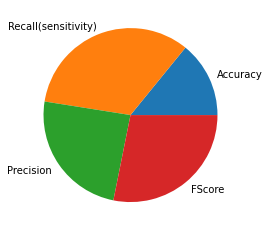

In [248]:
select_features=df[df.importance>=0.03].feature

# knn
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform').fit(X_train[select_features], y_train)
y_predict_knn = knn.predict(X_test[select_features])
pd.crosstab(y_test, y_predict_knn)
binaryClassificationMetrics = evaluateBinaryClassification(y_predict_knn, y_test)


# display binary classification metrics
pieLabels = ["Accuracy", "Recall(sensitivity)", "Precision", "FScore"]
plt.pie(binaryClassificationMetrics, labels = pieLabels)
